In [2]:
import tqdm

import torch
from stemgnn.handler import load_model
import pandas as pd

ModuleNotFoundError: No module named 'tqdm'

In [3]:
import os
import torch
from datetime import datetime
from stemgnn.handler import train, test
import argparse
import pandas as pd
from dataclasses import dataclass


@dataclass
class ARGS:
	train = True
	evaluate = True
	dataset = "ECG_data"
	window_size = 12
	horizon = 3
	train_length = 7
	valid_length = 2
	test_length = 1
	epoch = 50
	lr = 1e-3
	multi_layer = 5
	device = 'cuda'
	validate_freq = 1
	batch_size = 32
	norm_method = 'min_max'
	optimizer = "RMSProp"
	early_stop = False
	exponential_decay_step = 5
	decay_rate = 0.05
	dropout_rate = 0.5
	leakyrelu_rate = 0.2


args = ARGS()

data_file = os.path.join('../dataset', args.dataset + '.csv')
result_train_file = os.path.join('../output', args.dataset, 'train')
result_test_file = os.path.join('../output', args.dataset, 'test')
if not os.path.exists(result_train_file):
    os.makedirs(result_train_file)
if not os.path.exists(result_test_file):
    os.makedirs(result_test_file)
pdf_data = pd.read_csv(data_file, header=None)
data = pdf_data.values

# split data
train_ratio = args.train_length / (args.train_length + args.valid_length + args.test_length)
valid_ratio = args.valid_length / (args.train_length + args.valid_length + args.test_length)
test_ratio = 1 - train_ratio - valid_ratio
train_data = data[:int(train_ratio * len(data))]
valid_data = data[int(train_ratio * len(data)):int((train_ratio + valid_ratio) * len(data))]
test_data = data[int((train_ratio + valid_ratio) * len(data)):]

ModuleNotFoundError: No module named 'tqdm'

In [7]:
from stemgnn.utils.data import ForecastDataset
import numpy as np

train_mean = np.mean(train_data, axis=0)
train_std = np.std(train_data, axis=0)
normalize_statistic = {"mean": train_mean.tolist(), "std": train_std.tolist()}

train_set = ForecastDataset(train_data, window_size=args.window_size, horizon=args.horizon,
                                normalize_method=args.norm_method, norm_statistic=normalize_statistic)

In [8]:
from torch.utils.data import DataLoader

model = load_model("../output/ECG_data/train")

dataloader = DataLoader(train_set, batch_size=32)

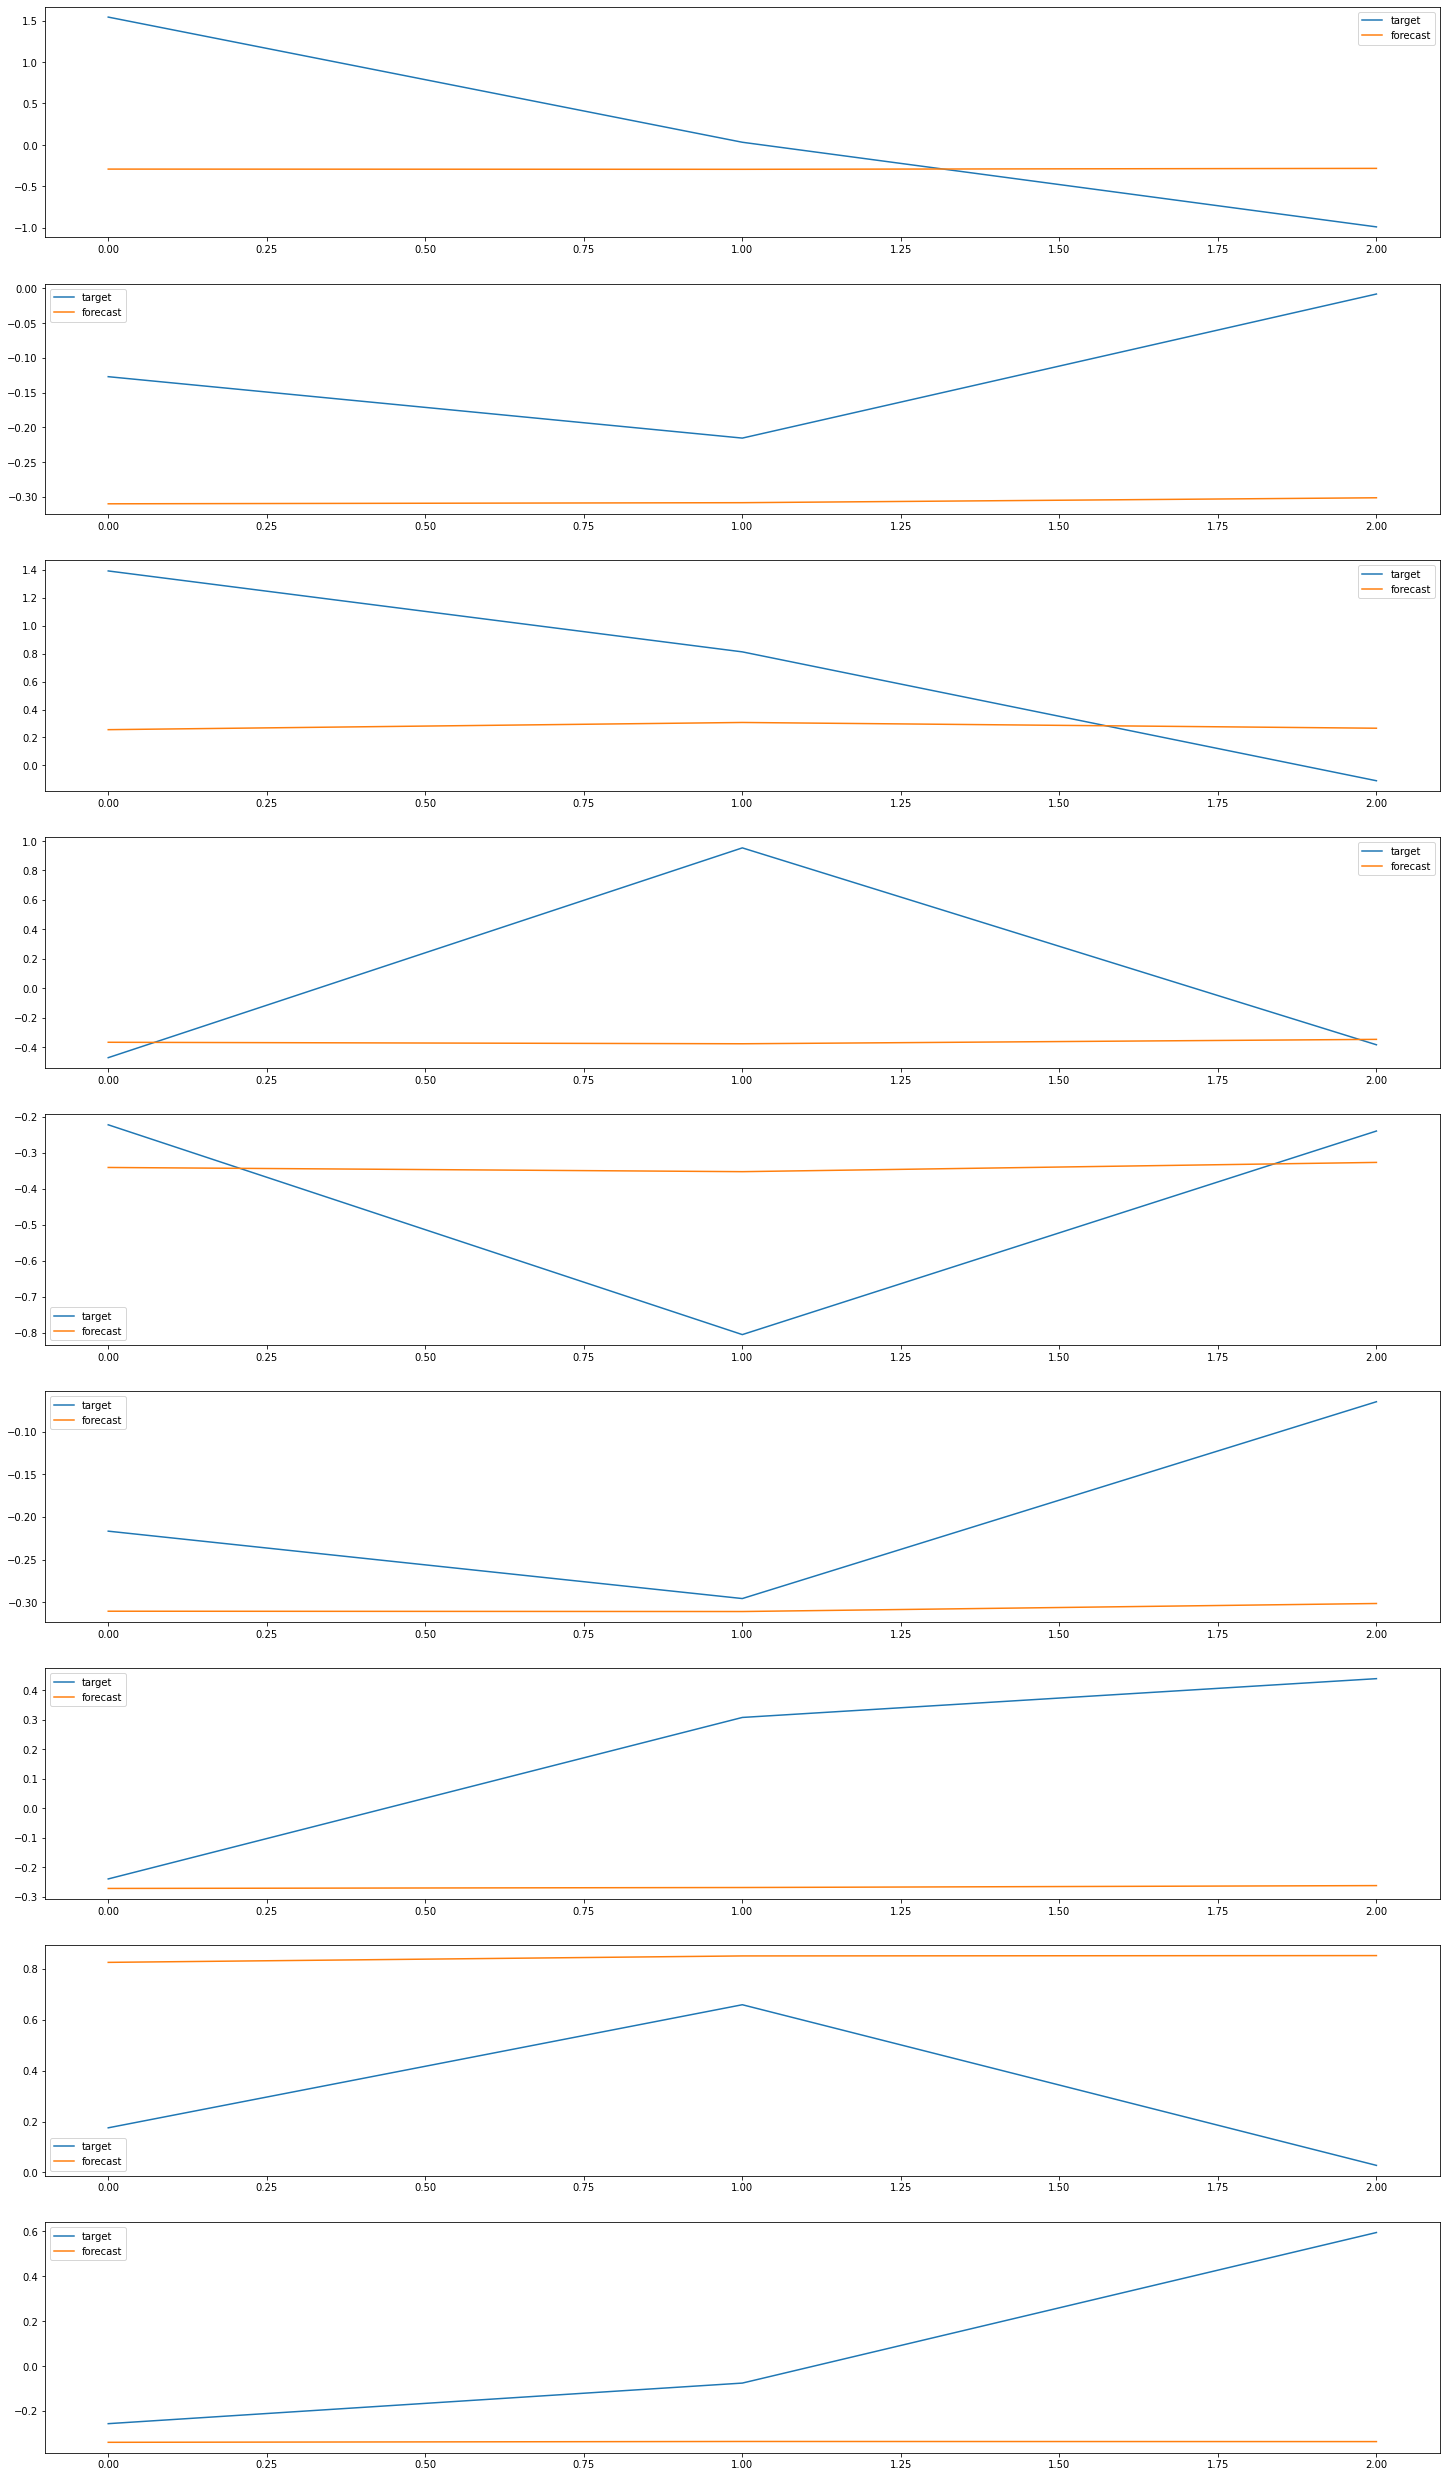

In [9]:
import matplotlib.pyplot as plt
from stemgnn.handler import inference

from random import randint

x_forecast, x_target = inference(model, dataloader=dataloader, device=args.device, node_cnt=140, window_size=args.window_size, horizon=args.horizon)

fig, axes = plt.subplots(9, figsize=(25, 45))

for ax in axes:
    random_idx = randint(0, len(x_forecast))

    ax.plot(x_target[random_idx][:, 123], label="target")
    ax.plot(x_forecast[random_idx][:, 123], label="forecast")
    ax.legend()
